### 1. 목표 설정

1. 보스턴 집값 데이터를 이용하여 회기분석 진행
2. 특성곲을 이용하여 새로운 특성 만들기
3. 규제 모델을 이용하여 모델의 복잡도 제어

### 2. CSV 파일 불러오기

- csv파일 불러오기 (보스턴 주택 데이터)

In [1]:
# 필요한 라이브러리

import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
# 데이터 불러오기

boston = pd.read_csv('./data/boston_housing.csv')

In [3]:
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# 필요없는 Unnamed 컬럼 삭제

boston.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**결측치 없음**

**특성 정보 확인**

- CRIM : 범죄율
- INDUS : 비소매 상업지역의 면적 비율 (-> 도매상업지역의 면적)
- NOX : 대기 중 일산화질소의 농도
- RM : 주택당 방의 개수
- LSTAT : 인구 중 하위 계층의 비율
- B : 인구 중 흑인 비율
- PTRATIO : 학생, 교사 비율
- ZN : 25,000 평방 피트를 초과한 거주지역의 비율
- CHAS : 찰스강의 경게에 위치한 경우는 1, 아닌 경우는 0
- AGE : 1940년 이전에 지어진 주택의 비율
- DIS : 직업센터의 거리
- TAX : 재산세율

**종속변수 확인**

- MEDV : 주택 가격 (집값)

### 3. 데이터 전처리

- 결측치는 없다
- 보스턴 주택 데이터는 학습용으로 제공된 데이터라 전처리 필요 없음 (데이터 깔끔함)

### 4. 탐색적 데이터 분석
**생략**

### 5. 모델링

1. 데이터 분리 (X_train, X_test, y_train, y_test)
2. 모델 선정 및 학습 / 평가 / 예측

In [7]:
# 데이터 분리
# step.1 : 데이터를 분리하기 위한 모듈
from sklearn.model_selection import train_test_split

# step.2 : 데이터를 분리 (y (정답 데이터는 MEDV 컬럼))
# 현재 데이터 상태부터 확인 후 문제와 정답 train, test 모두 한곳에 있는 데이터
# 문제와 정답을 분할 한 후 모듈을 실행
X = boston.drop("MEDV", axis=1)
y = boston["MEDV"]

# train_test_split 모듈 실행
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=8)


# step.3 : 데이터 분할 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [8]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

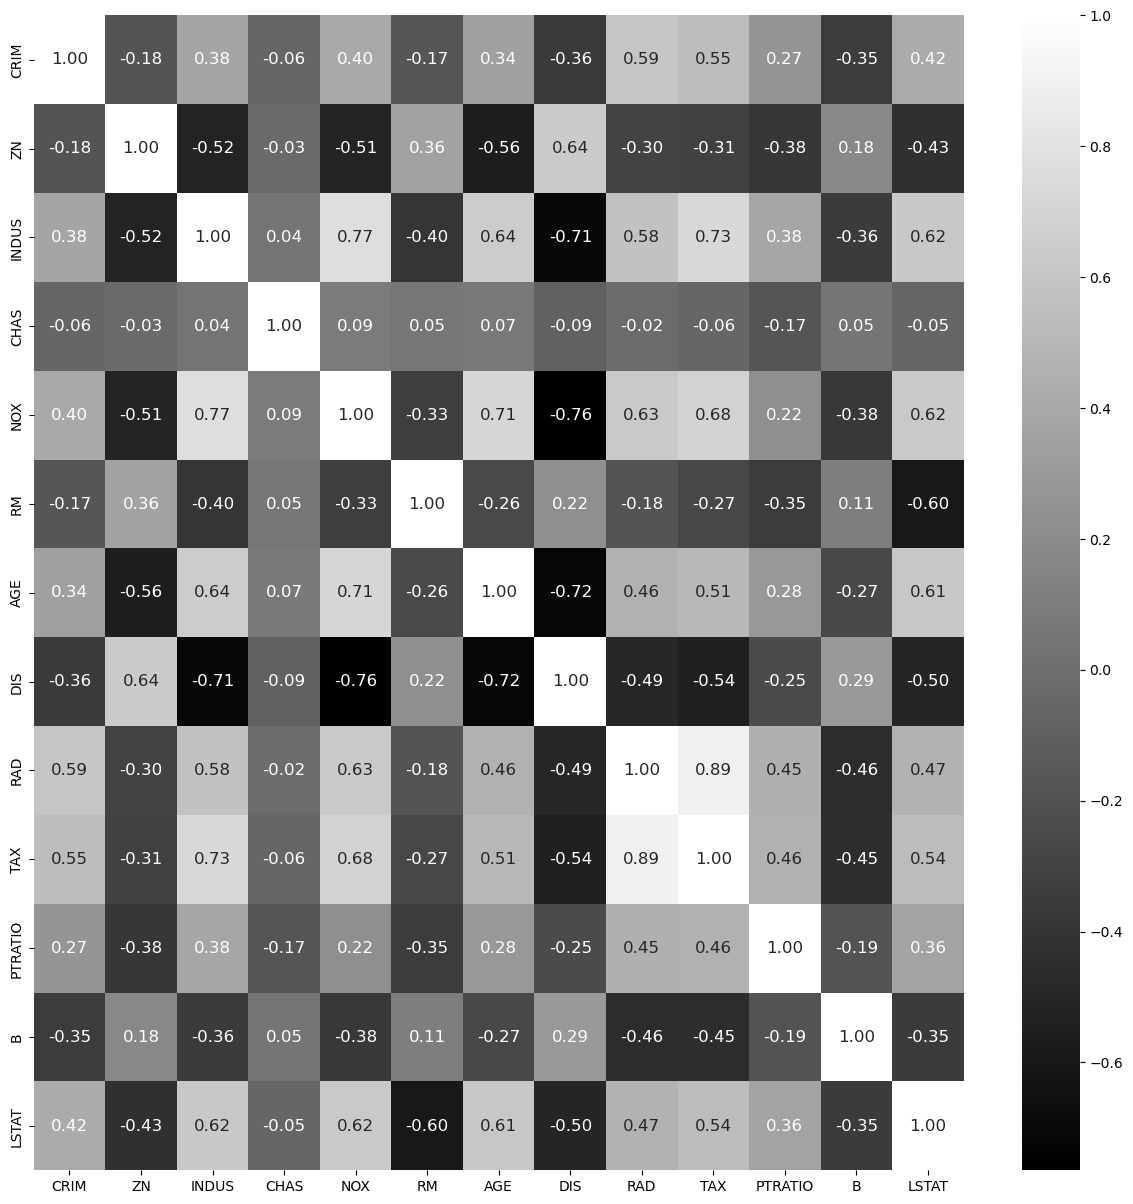

In [9]:
# 상관계수를 히트맵으로 출력

plt.figure(figsize=(15, 15))
sns.heatmap(data= X_train.corr(),
            annot= True, # 히트맵 내부에 글씨
            annot_kws={"size" : 12}, # 내부 글씨의 옵션 (글씨의 크기)
            fmt= ".2f", # 소수점 자리 출력
            cmap= "gray" # 히트멥 색상
            )

In [10]:
# 선형회귀 모델 사용
# 1. 모델 import

from sklearn.linear_model import LinearRegression

In [11]:
# 2. 모델 객체 생성

lm = LinearRegression()

In [12]:
# 3. 모델 학습

lm.fit(X_train, y_train)

LinearRegression()

In [13]:
# 4. 교차 검증

from sklearn.model_selection import cross_val_score

result = cross_val_score(lm, X_train, y_train, cv = 6)
print(result)
print(result.mean())

[0.77594119 0.7051459  0.82354719 0.52256368 0.80309716 0.49041329]
0.6867847360632918


In [14]:
# 가중치 W 확인

lm.coef_

array([-1.08934120e-01,  5.31327453e-02,  2.34402817e-02,  2.48890273e+00,
       -1.22283083e+01,  3.88090530e+00, -8.65043560e-03, -1.39279889e+00,
        2.72090186e-01, -1.11667903e-02, -9.34401294e-01,  1.05766056e-02,
       -5.59850621e-01])

In [15]:
# 편향 B값 확인

lm.intercept_

32.75619254730977

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
# 정답 예측

pre = lm.predict(X_test)

회귀 평가 지표를 이용하여 모델 평가 실행\
MSE. MAE, RMSE, R2 스코어

In [18]:
# 평가지표 import
# 

from sklearn.metrics import mean_squared_error # 평균 제곱 오차
from sklearn.metrics import mean_absolute_error # 평균 절대 오차
from sklearn.metrics import r2_score # r2 스코어

In [19]:
# MSE 사용

mean_squared_error(pre, y_test)

23.716180926283442

In [20]:
# RMSE 사용
# 사이킷런 내부에서 지원하지 않음 - 넘파이에 있는 sqrt 함수

np.sqrt(mean_squared_error(pre, y_test))

4.869926172570119

In [21]:
# MAE 사용

mean_absolute_error(pre, y_test)

3.4532926552623264

In [22]:
# r2 스코어 사용

r2_score(pre, y_test)

0.6570277457568254

# 0809

- 현재 회귀모델은 성능이 그리 좋은 편은 아님
- 일반적으로 선형회귀 모델은 데이터의 특성이 많을수록 성능이 좋아짐
- 특성이 적은 경우 선형회귀 모델이 간단(단순) 해짐 → 성능이 낮아짐
- = 모델을 제어할 수 있는 하이퍼 파라미터 조정이 불가능해지기 때문

### 목표 설정
**특성 곱을 이용하여 새로운 특성을 만들어보기**\
= **원본 데이터 프레임 복사하기**

**원본 데이터 프레임 복사하기**

In [23]:
# copy() = 데이터 프레임의 현재 상태를 복사, 복사 당시의 데이터 프레임 상태만 복사하는 깊은 복사

X_train_copy = X_train.copy()

In [24]:
# 기존의 훈련용 문제 데이터에 훈련용 정답 컬럼을 추가
# 정답을 포함한 상관간계를 파악하기 위해 → 정답 컬럼을 추가함

X_train_copy["MEDV"] = y_train

In [25]:
# 데이터 프레임의 형태가 바뀜 (shape, info)

X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 17 to 451
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    float64
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    float64
 9   TAX      354 non-null    float64
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    354 non-null    float64
 13  MEDV     354 non-null    float64
dtypes: float64(14)
memory usage: 41.5 KB


In [26]:
X_train_copy.shape

(354, 14)

In [27]:
# 훈련용 데이터 상관관계 확인

X_train_copy.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182937,0.376299,-0.060861,0.403308,-0.171128,0.340789,-0.362843,0.594251,0.545004,0.267743,-0.348000,0.415125,-0.367320
ZN,-0.182937,1.000000,-0.522421,-0.028334,-0.510633,0.355158,-0.558727,0.636020,-0.301522,-0.313148,-0.382122,0.179154,-0.432618,0.409318
INDUS,0.376299,-0.522421,1.000000,0.036183,0.769310,-0.399291,0.643300,-0.711740,0.579389,0.725878,0.383825,-0.355823,0.619686,-0.500334
CHAS,-0.060861,-0.028334,0.036183,1.000000,0.089168,0.054014,0.071898,-0.090506,-0.019416,-0.060153,-0.174327,0.046020,-0.054811,0.173157
NOX,0.403308,-0.510633,0.769310,0.089168,1.000000,-0.330699,0.713332,-0.764739,0.625537,0.683354,0.222476,-0.375495,0.622120,-0.450981
RM,-0.171128,0.355158,-0.399291,0.054014,-0.330699,1.000000,-0.258584,0.221348,-0.179420,-0.273715,-0.346742,0.107636,-0.597224,0.682933
AGE,0.340789,-0.558727,0.643300,0.071898,0.713332,-0.258584,1.000000,-0.717366,0.456727,0.509456,0.283653,-0.266401,0.609375,-0.416446
DIS,-0.362843,0.636020,-0.711740,-0.090506,-0.764739,0.221348,-0.717366,1.000000,-0.491937,-0.543658,-0.245896,0.293658,-0.503820,0.277109
RAD,0.594251,-0.301522,0.579389,-0.019416,0.625537,-0.179420,0.456727,-0.491937,1.000000,0.894749,0.451842,-0.459237,0.465304,-0.371693
TAX,0.545004,-0.313148,0.725878,-0.060153,0.683354,-0.273715,0.509456,-0.543658,0.894749,1.000000,0.460166,-0.449736,0.536399,-0.468239


- 현재 MEDV 컬럼의 관계가 섞여있음, 정리를 한 후 확인해보기

In [28]:
# 내부의 상관계수 값을 절대값으로 변경

X_train_abs = X_train_copy.corr().abs()

# 절대값으로 변경된 상관계수는 내림차순으로 정렬 (기준 : MEDV)

X_train_abs.sort_values(by = 'MEDV', ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,0.367320,0.409318,0.500334,0.173157,0.450981,0.682933,0.416446,0.277109,0.371693,0.468239,0.513930,0.334972,0.750401,1.000000
LSTAT,0.415125,0.432618,0.619686,0.054811,0.622120,0.597224,0.609375,0.503820,0.465304,0.536399,0.360717,0.353329,1.000000,0.750401
RM,0.171128,0.355158,0.399291,0.054014,0.330699,1.000000,0.258584,0.221348,0.179420,0.273715,0.346742,0.107636,0.597224,0.682933
PTRATIO,0.267743,0.382122,0.383825,0.174327,0.222476,0.346742,0.283653,0.245896,0.451842,0.460166,1.000000,0.186885,0.360717,0.513930
INDUS,0.376299,0.522421,1.000000,0.036183,0.769310,0.399291,0.643300,0.711740,0.579389,0.725878,0.383825,0.355823,0.619686,0.500334
TAX,0.545004,0.313148,0.725878,0.060153,0.683354,0.273715,0.509456,0.543658,0.894749,1.000000,0.460166,0.449736,0.536399,0.468239
NOX,0.403308,0.510633,0.769310,0.089168,1.000000,0.330699,0.713332,0.764739,0.625537,0.683354,0.222476,0.375495,0.622120,0.450981
AGE,0.340789,0.558727,0.643300,0.071898,0.713332,0.258584,1.000000,0.717366,0.456727,0.509456,0.283653,0.266401,0.609375,0.416446
ZN,0.182937,1.000000,0.522421,0.028334,0.510633,0.355158,0.558727,0.636020,0.301522,0.313148,0.382122,0.179154,0.432618,0.409318
RAD,0.594251,0.301522,0.579389,0.019416,0.625537,0.179420,0.456727,0.491937,1.000000,0.894749,0.451842,0.459237,0.465304,0.371693


- 상관관계의 범위는 -1 ~ 1
- 현재 절대값으로 변경된 상관계수를 확인 후 같은 컬럼을 제외한 상관계수가 높은 컬럼 2개 찾기
- LSTAT과 RM이란 컬럼이 상관계수가 높음\ 
- = 이 두가지 컬럼을 가지고 특성 곱이라는 확장을 진행

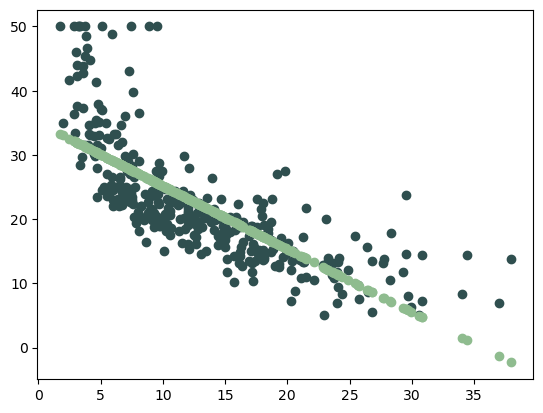

In [29]:
# 상관관계가 높은 데이터를 가지고 특성 확장
# 확장 전) 먼저 LSTAT 특성만 가지고 학습 시킨 후 예측을 어떻게 하는지 시각화

# 모델 학습 (LSTAT만 가지고 학습)

model = LinearRegression()
model.fit(X_train[["LSTAT"]], y_train)

pre = model.predict(X_train[["LSTAT"]])

# 차트 그려보기 (scatter 차트 두개 : 실제 데이터와 예측 데이터)

plt.scatter(X_train["LSTAT"], y_train, color="darkslategray") # 실제 데이터 스캐터 차트
plt.scatter(X_train["LSTAT"], pre, color="darkseagreen") # 예측 데이터 스캐터 차트

plt.show()

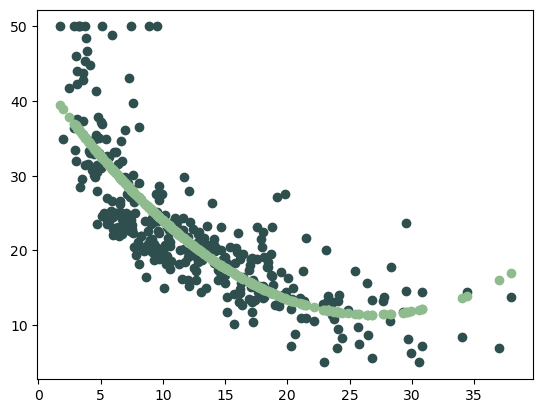

In [30]:
# 특성 확장 후 : 본래 LSTAT 특성과 확장 LSTAT 특성을 가지고 학습 시킨 후 예측을 어떻게 하는지 확인

X_train["LSTAT x LSTAT"] = X_train["LSTAT"] * X_train["LSTAT"] # 특성 추가 확장

# 모델 학습
model2 = LinearRegression()
model2.fit(X_train[["LSTAT", "LSTAT x LSTAT"]], y_train)

pre = model2.predict(X_train[["LSTAT", "LSTAT x LSTAT"]])

plt.scatter(X_train["LSTAT"], y_train, color="darkslategray")
plt.scatter(X_train["LSTAT"], pre, color="darkseagreen")

plt.show()

<font color = "red"> **<주의>**</font> 직선의 형태가 아님 : 곡선이면 비선형?\
    - 다항 회귀에 이해가 필요함\
    - 다항 회귀 : 독립변수의 단항식이 아닌(독립변수 X가 1개가 아닌) 2차, 3차 방정식과 같은 다항식으로 표현된 것
    
<font color = "gray"> 
    1. 다항 회귀를 선형이 아닌 비선형이라 혼동 할 수 있음 허나 선형 회귀임을 잊지 말기<br>
    2. 선형, 비선형의 회귀를 나누는 기준은? = 가중치(회귀 계수, w)가 선형, 비선형인지 확인<br>
    3. 독립변수(문제 데이터, 특성, X)가 선형, 비선형인지를 따르지 않음
</font>

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 17 to 451
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           354 non-null    float64
 1   ZN             354 non-null    float64
 2   INDUS          354 non-null    float64
 3   CHAS           354 non-null    float64
 4   NOX            354 non-null    float64
 5   RM             354 non-null    float64
 6   AGE            354 non-null    float64
 7   DIS            354 non-null    float64
 8   RAD            354 non-null    float64
 9   TAX            354 non-null    float64
 10  PTRATIO        354 non-null    float64
 11  B              354 non-null    float64
 12  LSTAT          354 non-null    float64
 13  LSTAT x LSTAT  354 non-null    float64
dtypes: float64(14)
memory usage: 41.5 KB


In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 337 to 238
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     152 non-null    float64
 1   ZN       152 non-null    float64
 2   INDUS    152 non-null    float64
 3   CHAS     152 non-null    float64
 4   NOX      152 non-null    float64
 5   RM       152 non-null    float64
 6   AGE      152 non-null    float64
 7   DIS      152 non-null    float64
 8   RAD      152 non-null    float64
 9   TAX      152 non-null    float64
 10  PTRATIO  152 non-null    float64
 11  B        152 non-null    float64
 12  LSTAT    152 non-null    float64
dtypes: float64(13)
memory usage: 16.6 KB


In [33]:
# X_train에도 확장 LSTAT를 추가

X_test["LSTAT x LSTAT"] = X_test["LSTAT"] * X_test["LSTAT"]

In [34]:
# 모델 객체 생성

model = LinearRegression()

In [35]:
# 모델 학습

model.fit(X_train, y_train) # 이때 X_train에는 확장 된 LSTAT 컬럼 추가

LinearRegression()

In [36]:
# 모델 평가 - score : 약 70%
# 현재 약 5% 정도 오름

model.score(X_test, y_test)

0.7587390463589593

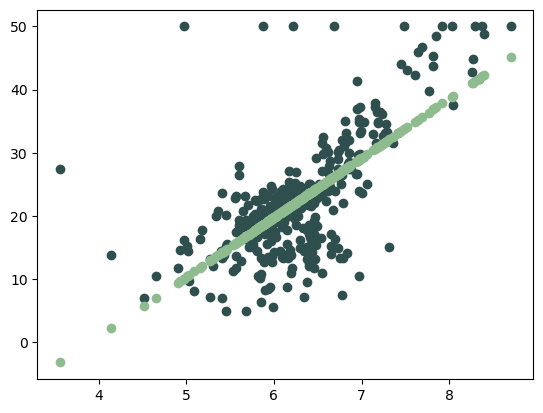

In [37]:
# 상관관계가 높은 데이터를 가지고 특성 확장
# 확장 전) 먼저 RM 특성만 가지고 학습 시킨 후 예측을 어떻게 하는지 시각화

# 모델 학습 (RM만 가지고 학습)

model = LinearRegression()
model.fit(X_train[["RM"]], y_train)

pre = model.predict(X_train[["RM"]])

# 차트 그려보기 (scatter 차트 두개 : 실제 데이터와 예측 데이터)

plt.scatter(X_train["RM"], y_train, color="darkslategray") # 실제 데이터 스캐터 차트
plt.scatter(X_train["RM"], pre, color="darkseagreen") # 예측 데이터 스캐터 차트

plt.show()

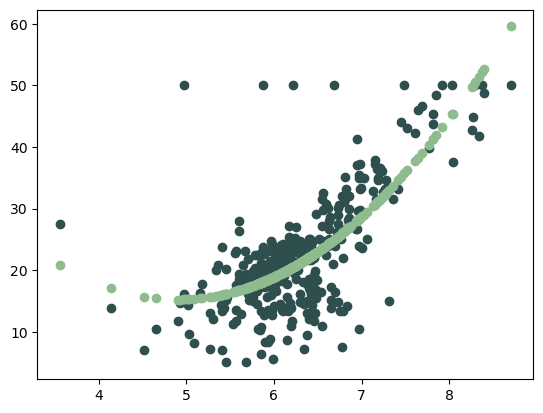

In [38]:
# 특성 확장 후 : 본래 RM 특성과 확장 RM 특성을 가지고 학습 시킨 후 예측을 어떻게 하는지 확인

X_train["RM x RM"] = X_train["RM"] * X_train["RM"] # 특성 추가 확장

# 모델 학습
model2 = LinearRegression()
model2.fit(X_train[["RM", "RM x RM"]], y_train)

pre = model2.predict(X_train[["RM", "RM x RM"]])

plt.scatter(X_train["RM"], y_train, color="darkslategray")
plt.scatter(X_train["RM"], pre, color="darkseagreen")

plt.show()

In [39]:
# RM 특성 확장해서 실제 평가까지 진행

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 17 to 451
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           354 non-null    float64
 1   ZN             354 non-null    float64
 2   INDUS          354 non-null    float64
 3   CHAS           354 non-null    float64
 4   NOX            354 non-null    float64
 5   RM             354 non-null    float64
 6   AGE            354 non-null    float64
 7   DIS            354 non-null    float64
 8   RAD            354 non-null    float64
 9   TAX            354 non-null    float64
 10  PTRATIO        354 non-null    float64
 11  B              354 non-null    float64
 12  LSTAT          354 non-null    float64
 13  LSTAT x LSTAT  354 non-null    float64
 14  RM x RM        354 non-null    float64
dtypes: float64(15)
memory usage: 44.2 KB


In [40]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 337 to 238
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           152 non-null    float64
 1   ZN             152 non-null    float64
 2   INDUS          152 non-null    float64
 3   CHAS           152 non-null    float64
 4   NOX            152 non-null    float64
 5   RM             152 non-null    float64
 6   AGE            152 non-null    float64
 7   DIS            152 non-null    float64
 8   RAD            152 non-null    float64
 9   TAX            152 non-null    float64
 10  PTRATIO        152 non-null    float64
 11  B              152 non-null    float64
 12  LSTAT          152 non-null    float64
 13  LSTAT x LSTAT  152 non-null    float64
dtypes: float64(14)
memory usage: 17.8 KB


In [41]:
# test에도 확장 RM 추가

X_test["RM x RM"] = X_test["RM"] * X_test["RM"]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 337 to 238
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           152 non-null    float64
 1   ZN             152 non-null    float64
 2   INDUS          152 non-null    float64
 3   CHAS           152 non-null    float64
 4   NOX            152 non-null    float64
 5   RM             152 non-null    float64
 6   AGE            152 non-null    float64
 7   DIS            152 non-null    float64
 8   RAD            152 non-null    float64
 9   TAX            152 non-null    float64
 10  PTRATIO        152 non-null    float64
 11  B              152 non-null    float64
 12  LSTAT          152 non-null    float64
 13  LSTAT x LSTAT  152 non-null    float64
 14  RM x RM        152 non-null    float64
dtypes: float64(15)
memory usage: 19.0 KB


In [42]:
# 모델 객체 생성

model = LinearRegression()

In [43]:
# 모델 학습

model.fit(X_train, y_train) # 추가 된 컬럼은 확장LSTAT, 확장RM

LinearRegression()

In [44]:
# 모델 평가

model.score(X_test, y_test) # 추가 된 컬럼은 확장LSTAT, 확장RM 

0.7770548249367983

- 정리
    - 특성 확장을 진행하여 선형회귀 모델의 성능이 개선된 것을 확인
    - 기존 LSTAT과 RM라는 컬럼만 특성확장을 진행
    - <가설> 전체 컬럼을 가지고 특성 확장을 진행하면 성능이 좋아질까?

In [45]:
# 전체 컬럼을 가지고 특성 확장 진행
# 1. 기존에 특성이 확장된 컬럼을 삭제

X_train.drop(["LSTAT x LSTAT", "RM", "RM"], axis=1, inplace=True)
X_test.drop(["LSTAT x LSTAT", "RM", "RM"], axis=1, inplace=True)

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 17 to 451
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    float64
 4   NOX      354 non-null    float64
 5   AGE      354 non-null    float64
 6   DIS      354 non-null    float64
 7   RAD      354 non-null    float64
 8   TAX      354 non-null    float64
 9   PTRATIO  354 non-null    float64
 10  B        354 non-null    float64
 11  LSTAT    354 non-null    float64
 12  RM x RM  354 non-null    float64
dtypes: float64(13)
memory usage: 38.7 KB


In [47]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 337 to 238
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     152 non-null    float64
 1   ZN       152 non-null    float64
 2   INDUS    152 non-null    float64
 3   CHAS     152 non-null    float64
 4   NOX      152 non-null    float64
 5   AGE      152 non-null    float64
 6   DIS      152 non-null    float64
 7   RAD      152 non-null    float64
 8   TAX      152 non-null    float64
 9   PTRATIO  152 non-null    float64
 10  B        152 non-null    float64
 11  LSTAT    152 non-null    float64
 12  RM x RM  152 non-null    float64
dtypes: float64(13)
memory usage: 16.6 KB


In [48]:
# X_train의 컬럼은 13개 -> 모든 컬럼 확장
# 원본 확보

X_train_copy2 = X_train.copy() # (X_train.copy() = 원본 유지)

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
# 반복문 작성

for col1 in X_train.columns : # 총 13번 반복 (컬럼의 개수만큼)
    for col2 in X_train.columns : # (마찬가지로 13번 반복)
        X_train_copy2[col1+"x"+col2] = X_train[col1] * X_train[col2]

In [51]:
X_train_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 17 to 451
Columns: 182 entries, CRIM to RM x RMxRM x RM
dtypes: float64(182)
memory usage: 506.1 KB


In [52]:
# test에서 진행된 전처리, 데이터 변경 -> test에서도 반복

X_test_copy2 = X_test.copy()

for col1 in X_test.columns :
    for col2 in X_test.columns :
        X_test_copy2[col1+"x"+col2] = X_test[col1] * X_test[col2]

In [53]:
X_test_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 337 to 238
Columns: 182 entries, CRIM to RM x RMxRM x RM
dtypes: float64(182)
memory usage: 217.3 KB


In [54]:
# 모델 객체 생성

model = LinearRegression()

In [55]:
# 모델 학습

model.fit(X_train_copy2, y_train)

LinearRegression()

In [56]:
# 모델 평가
# 70% - 75% - 77% - 84%

model.score(X_test_copy2, y_test)

0.8451266162022999

In [57]:
# 과대적합이 아닐 지 확인을 해야 함

model.score(X_train_copy2, y_train)

0.9381871267856524

- 특성 확장을 진행 해봤더니 성능 자체는 올라간 것 처럼 보임
- 허나 모델 자체가 복잡해져 과대적합의 모습을 보이고 있음
    - 일반화에 크게 도움이 된 것 같진 않음

### 규 제
##### L1 규제, L2 규제

- 선형회귀에서 모델의 일반화를 위해 과적합 상태를 어떻게 제어할 것?

라쏘, 릿지, 엘라스틱 넷\
(alpha : 규제의 강도)\
alpha 커지면 : 과대적합 감소 오차 증가\
alpha 줄어들면 : 과대적합 증가 오차 감소

- L1 Lasso 규제 : 가중치에 똑같은 힘으로 규제를 적용하는 방법,\
자동으로 특성 선택이 일어남
- L2 Ridge 규제 : 모든 가중치에 같은 비율로 규제를 적용하는 방법,\
0이 되는 가중치가 있다 → 비율이라는 방법으로 규제를 적용해서

### Ridge 모델

In [58]:
# 모델 불러오기

from sklearn.linear_model import Ridge

In [59]:
# 모델 객체 생성

ridge_model = Ridge(alpha=100) # alpha의 기본값은 1.0

In [60]:
# 모델 학습

ridge_model.fit(X_train_copy2, y_train)

Ridge(alpha=100)

In [61]:
# 모델 평가
 
ridge_model.score(X_test_copy2, y_test)

0.8423392317164484

In [62]:
ridge_model.score(X_train_copy2, y_train)

0.9213902192249325

### Lasso 모델

In [63]:
from sklearn.linear_model import Lasso

In [64]:
lasso_model = Lasso(alpha=100)

In [65]:
lasso_model.fit(X_train_copy2, y_train)

Lasso(alpha=100)

In [66]:
lasso_model.score(X_test_copy2, y_test)

0.7945545837090771

In [67]:
# 반복문을 이용하여 Ridge와 Lasso의 alpha값을 조절하고 모델 비교
# 1. 알파값
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000]

# 2. Ridge 모델과 Lasso 모델 가중치 를 기록할 리스트 만들기
ridge_coef_list = []
lasso_coef_list = []

# 3. 반복문 생성 모델 (제작, 학습, 리스트에 기록)
for i in alpha_list : 
    r_model = Ridge(alpha=i)
    l_model = Ridge(alpha=i)
    # 모델 학습
    r_model.fit(X_train, y_train)
    l_model.fit(X_train, y_train)
    # 가중치 확인 후 리스트에 넣기
    ridge_coef_list.append(r_model.coef_)
    lasso_coef_list.append(l_model.coef_)

In [68]:
# lasso 정규화 w값 확인

lasso_df = pd.DataFrame(np.array(lasso_coef_list).T,
                       columns=alpha_list,
                       index=X_train.columns)
lasso_df

,0.001,0.010,0.100,10.000,100.000,1000.000
CRIM,-0.110913,-0.110857,-0.110350,-0.106005,-0.104707,-0.093184
ZN,0.048096,0.048104,0.048177,0.048645,0.045488,0.036488
INDUS,0.038187,0.037776,0.034038,0.001775,0.022346,0.058287
CHAS,2.542014,2.539738,2.518154,1.654477,0.449400,0.069732
NOX,-12.079119,-11.973833,-11.013469,-1.086647,-0.095953,-0.000949
AGE,-0.011968,-0.012043,-0.012729,-0.018749,-0.014630,-0.003257
DIS,-1.314966,-1.313293,-1.298020,-1.126693,-0.956560,-0.406940
RAD,0.256732,0.256436,0.253746,0.231674,0.234479,0.186462
TAX,-0.010758,-0.010765,-0.010826,-0.011814,-0.012475,-0.011717
PTRATIO,-0.869875,-0.868855,-0.859571,-0.775588,-0.751848,-0.466145


In [69]:
# ridge 정규화 w값 확인

ridge_df = pd.DataFrame(np.array(ridge_coef_list).T,
                       columns=alpha_list,
                       index=X_train.columns)
ridge_df

,0.001,0.010,0.100,10.000,100.000,1000.000
CRIM,-0.110913,-0.110857,-0.110350,-0.106005,-0.104707,-0.093184
ZN,0.048096,0.048104,0.048177,0.048645,0.045488,0.036488
INDUS,0.038187,0.037776,0.034038,0.001775,0.022346,0.058287
CHAS,2.542014,2.539738,2.518154,1.654477,0.449400,0.069732
NOX,-12.079119,-11.973833,-11.013469,-1.086647,-0.095953,-0.000949
AGE,-0.011968,-0.012043,-0.012729,-0.018749,-0.014630,-0.003257
DIS,-1.314966,-1.313293,-1.298020,-1.126693,-0.956560,-0.406940
RAD,0.256732,0.256436,0.253746,0.231674,0.234479,0.186462
TAX,-0.010758,-0.010765,-0.010826,-0.011814,-0.012475,-0.011717
PTRATIO,-0.869875,-0.868855,-0.859571,-0.775588,-0.751848,-0.466145


### <font color = "red"> 정리</font>
- 현재 보스턴 주택 데이터를 선형 회귀 분석 했을 때 규제항을 적용할 시\
라쏘(L1규제)가 조금 더 유리한 모습을 보이고 있음